# **Part 2: Geospatial Analysis - First Map**

This notebook will guide you through diverse techniques for managing and visualizing geospatial data, which includes data associated with geographic locations.


**Reading Data:** To begin, we'll utilize the GeoPandas library to read in geospatial data.

In [1]:
import geopandas as gpd


Geospatial data comes in various formats like shapefile, GeoJSON, KML, and GPKG. All these formats can be easily loaded using the **gpd.read_file()** function.

The following code cell imports a shapefile containing details about forests, wilderness areas, and other lands managed by the Department of Environmental Conservation in New York state. You can find all the data required for this study on this Kaggle dataset page:
https://www.kaggle.com/datasets/alexisbcook/geospatial-learn-course-data.


As you can see in the "CLASS" column, each of the first five rows corresponds to a different forest.

In [19]:
# Read in the data
Dec_lands_data = gpd.read_file("/content/sample_data/DEC_lands/DEC_lands.shp")

Dec_lands_data.head()


,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [5]:
type(Dec_lands_data)

geopandas.geodataframe.GeoDataFrame

In [6]:
#Subset of data "CLASS", "COUNTY", "geometry"
subset_data = Dec_lands_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [8]:
# How many lands of each type are there?
subset_data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [12]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands_df  = subset_data[subset_data['CLASS'].isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands_df .head()


,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


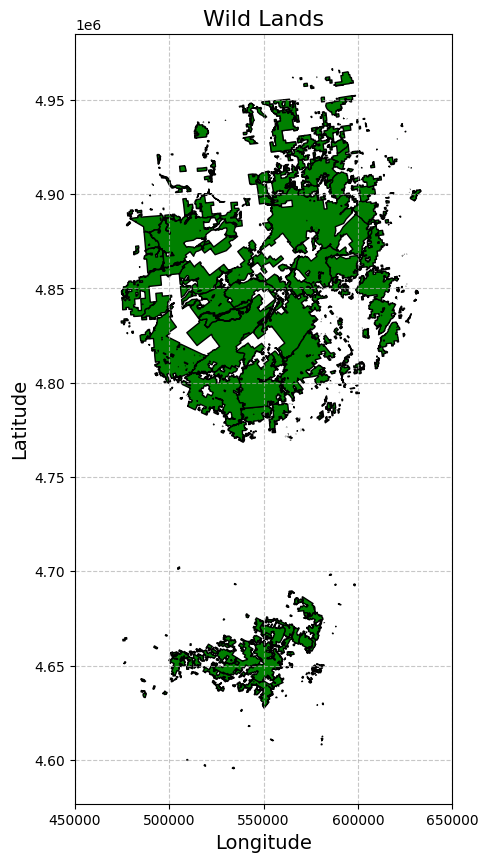

In [18]:
import matplotlib.pyplot as plt

# Plot the wild lands
fig, ax = plt.subplots(figsize=(10, 10))
wild_lands_df.plot(ax=ax, color='green', edgecolor='black')

# Add title and labels
ax.set_title('Wild Lands', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set the number of ticks on the x-axis
ax.set_xticks(ax.get_xticks()[::2])  # Adjust the step size to control the number of ticks

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


The plot above displays 2983 distinct Polygon objects, with each polygon representing a unique geographic shape. These shapes could correspond to various features such as land parcels, boundaries, or geographic regions. Each Polygon object is defined by a series of coordinate points that outline its boundary. As a result, the plot provides a visual representation of the spatial distribution and arrangement of these features within the dataset.